
# Linear Regression

## Imports

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

In [106]:
cust = pd.read_csv('Ecommerce Customers')

In [107]:
cust.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [108]:
cust.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [109]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

In [110]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

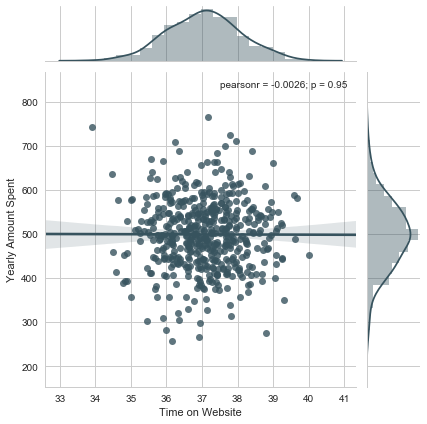

In [130]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=cust, kind='reg')

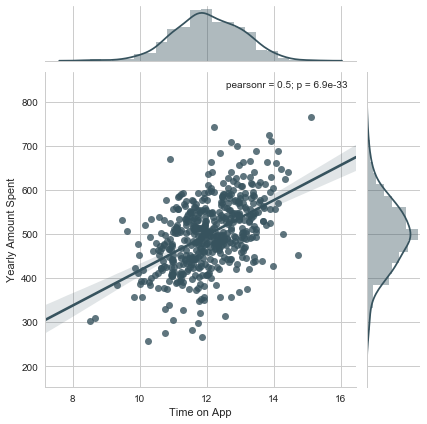

In [131]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=cust, kind='reg')

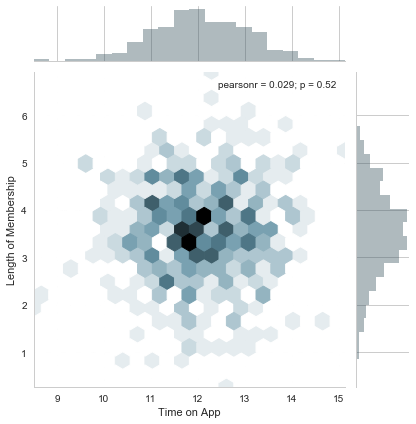

In [132]:
sns.jointplot(x='Time on App', y='Length of Membership', data=cust, kind='hex')

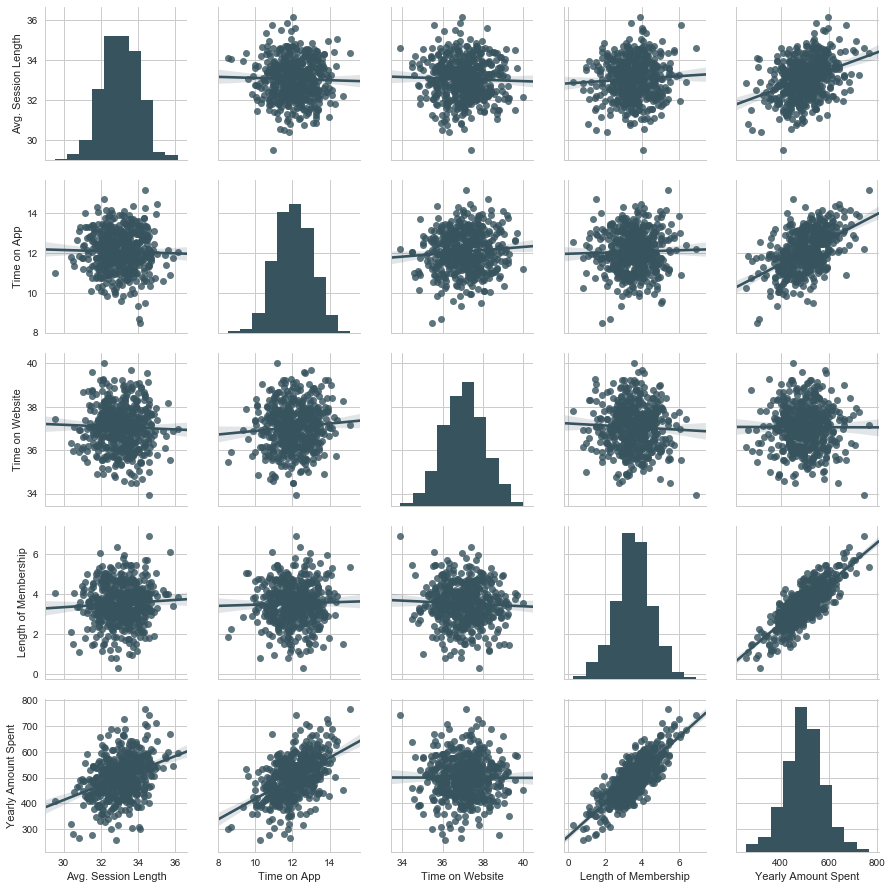

In [133]:
sns.pairplot(cust, kind='reg')

In [115]:
cust[['Length of Membership','Yearly Amount Spent']].corr()

,Length of Membership,Yearly Amount Spent
Length of Membership,1.000000,0.809084
Yearly Amount Spent,0.809084,1.000000


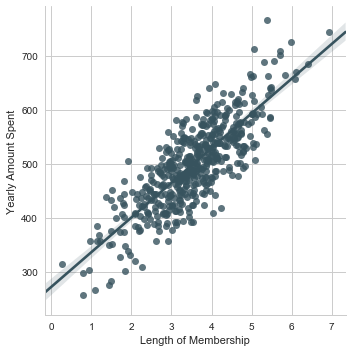

In [116]:
sns.lmplot('Length of Membership','Yearly Amount Spent', data=cust)

## Training and Testing Data

In [117]:
X= cust[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [118]:
y= cust['Yearly Amount Spent']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lm = LinearRegression()

In [123]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
print("Coefficient:", lm.coef_)

Coefficient: [ 25.98154972  38.59015875   0.19040528  61.27909654]


## Predicting Test Data

In [125]:
predictions = lm.predict(X_test)

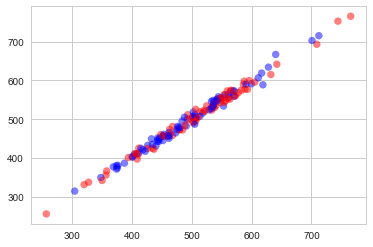

In [126]:
plt.scatter(y_test, predictions, c=['red','blue'], alpha = 0.5)

## Evaluating the Model

In [134]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


In [135]:
metrics.explained_variance_score(y_test, predictions)

0.98907712318896057

## Residuals

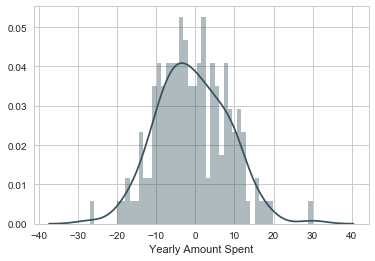

In [128]:
sns.distplot(y_test - predictions, bins=50)

## Conclusion

In [139]:
coeff_cust = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])
coeff_cust

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
